In [ ]:
#import the packages for linear algebra and tensorflow
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns


In [ ]:
#import the movie items dataset
df_movie=pd.read_csv('/content/movies.csv')

In [ ]:
#show the first 5 rows of movie dataset
df_movie.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#movie dataset dataset shape
df_movie.shape

(9742, 3)

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
#load the rating of movies dataset
df_rating=pd.read_csv('/content/ratings.csv')

In [ ]:
#show the first 5 rows of dataset
df_rating.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
df_rating.shape

(100836, 4)

In [ ]:
#show the total number of unique users, movies and ratings
unique_feature=['userId','movieId','rating']
for u in unique_feature:
    print(f'The ratings dataset has {df_rating[u].nunique()} unique {u}')

The ratings dataset has 610 unique userId
The ratings dataset has 9724 unique movieId
The ratings dataset has 10 unique rating


In [ ]:
#merge the ratings and movie dataset for implementing recommendation
df = pd.merge(df_rating,df_movie,on='movieId', how='inner')
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
#get the mean of rating and number of ratings for all unique movies
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),number_of_ratings = ('rating', 'count')).reset_index()

print(agg_ratings.head(10))



                                     title  mean_rating  number_of_ratings
0                               '71 (2014)     4.000000                  1
1  'Hellboy': The Seeds of Creation (2004)     4.000000                  1
2                   'Round Midnight (1986)     3.500000                  2
3                      'Salem's Lot (2004)     5.000000                  1
4                'Til There Was You (1997)     4.000000                  2
5          'Tis the Season for Love (2015)     1.500000                  1
6                       'burbs, The (1989)     3.176471                 17
7                     'night Mother (1986)     3.000000                  1
8              (500) Days of Summer (2009)     3.666667                 42
9           *batteries not included (1987)     3.285714                  7


In [ ]:
#define the movies in which more than 50 rates have been given
agg_rating_50 = agg_ratings[agg_ratings['number_of_ratings']>50]
agg_rating_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 18 to 9703
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              437 non-null    object 
 1   mean_rating        437 non-null    float64
 2   number_of_ratings  437 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
print(agg_rating_50.head(10))
agg_rating_50.shape

                                     title  mean_rating  number_of_ratings
18       10 Things I Hate About You (1999)     3.527778                 54
34                     12 Angry Men (1957)     4.149123                 57
74            2001: A Space Odyssey (1968)     3.894495                109
89                    28 Days Later (2002)     3.974138                 58
104                             300 (2007)     3.681250                 80
115         40-Year-Old Virgin, The (2005)     3.547297                 74
178    A.I. Artificial Intelligence (2001)     3.339286                 56
202                      Abyss, The (1989)     3.475806                 62
207      Ace Ventura: Pet Detective (1994)     3.040373                161
208  Ace Ventura: When Nature Calls (1995)     2.727273                 88


(437, 3)

In [ ]:
# show the 5 most rated movies
agg_rating_50.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278


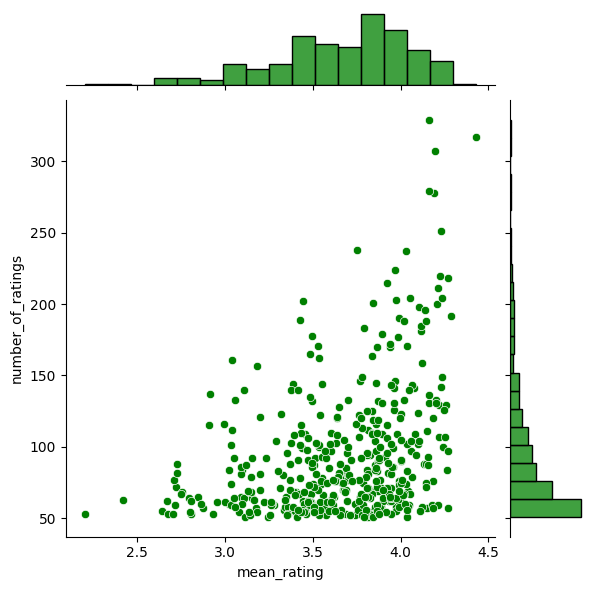

In [ ]:
# show the number of ratings given correspond to average of its rating(it demonstrates that the favorite movies have been rated more than not popular ones)
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_rating_50,color='green')

In [ ]:
# the recommender algorithm will be implemented on 437(popular movies )
agg_rating_50.shape

(437, 3)

In [ ]:
df.shape

(100836, 6)

In [ ]:
# Merge the popular movies to main dataset
df_50 = pd.merge(df, agg_rating_50[['title']], on='title', how='inner')
df_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40712 entries, 0 to 40711
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     40712 non-null  int64  
 1   movieId    40712 non-null  int64  
 2   rating     40712 non-null  float64
 3   timestamp  40712 non-null  int64  
 4   title      40712 non-null  object 
 5   genres     40712 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.9+ MB


In [ ]:
print(df_50.head())
df_50.shape

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


(40712, 6)

In [ ]:
# show the number of users and movies for popular movies(ratings are from 0.5 to 5 with step=0.5)
for u in unique_feature:
    print(f'The top 50 movie rated dataset has {df_50[u].nunique()} unique {u}')

The top 50 movie rated dataset has 606 unique userId
The top 50 movie rated dataset has 438 unique movieId
The top 50 movie rated dataset has 10 unique rating


In [ ]:
#make a dataset consistign of movie items as rows and users as columns for collaborative filtering algorithm
matrix = df_50.pivot_table(index='movieId', columns='userId', values='rating')
matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN


In [ ]:
matrix.shape

(438, 606)

In [ ]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.079070,NaN,NaN,NaN,0.07907,NaN,0.57907,NaN,NaN,NaN,...,0.07907,NaN,0.079070,-0.920930,0.079070,-1.420930,0.07907,-1.420930,-0.92093,1.079070
2,NaN,NaN,NaN,NaN,NaN,0.568182,NaN,0.568182,NaN,NaN,...,NaN,0.568182,NaN,1.568182,0.068182,NaN,NaN,-1.431818,NaN,NaN
3,0.740385,NaN,NaN,NaN,NaN,1.740385,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.259615,NaN,NaN
6,0.053922,NaN,NaN,NaN,NaN,0.053922,NaN,NaN,NaN,NaN,...,NaN,-0.946078,0.053922,-0.946078,NaN,NaN,NaN,NaN,NaN,1.053922
7,NaN,NaN,NaN,NaN,NaN,0.814815,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.685185,NaN,NaN,NaN,NaN


In [ ]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.203279,0.161749,-0.211192,-0.298544,0.425102,0.972006,0.081504,...,-0.152963,-0.153981,-0.115783,-0.264132,-0.025179,-0.119385,0.043495,-0.070783,0.233941,-0.129440
2,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.030525,...,-0.274983,NaN,-1.000000,NaN,NaN,0.740608,NaN,0.480247,NaN,0.744297
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,-0.404258,NaN,1.000000
4,0.203279,NaN,NaN,1.000000,-0.455185,0.351937,0.583111,0.105853,NaN,0.617611,...,-0.299442,0.390167,-0.029827,-0.247924,0.460749,-0.030654,0.075851,-0.261192,1.000000,-0.231754
5,0.161749,NaN,NaN,-0.455185,1.000000,-0.002239,0.161232,-0.251950,NaN,-0.815194,...,0.060226,-0.003851,0.027410,-0.165557,-0.234989,0.180206,0.012503,-0.230881,0.346950,-0.065387


In [ ]:
#get R matix as consistign of 1 (for rate given  to item) ,0 (not rate  given to item)

R = matrix_norm.apply(lambda col: col.apply(lambda r: 0 if pd.isna(r) else 1))


In [ ]:
print(R.head())
print(R.shape)

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1          1    0    0    0    1    0    1    0    0    0  ...    1    0    1   
2          0    0    0    0    0    1    0    1    0    0  ...    0    1    0   
3          1    0    0    0    0    1    0    0    0    0  ...    0    0    0   
6          1    0    0    0    0    1    0    0    0    0  ...    0    1    1   
7          0    0    0    0    0    1    0    0    0    0  ...    0    0    0   

userId   604  605  606  607  608  609  610  
movieId                                     
1          1    1    1    1    1    1    1  
2          1    1    0    0    1    0    0  
3          0    0    0    0    1    0    0  
6          1    0    0    0    0    0    1  
7          0    0    1    0    0    0    0  

[5 rows x 606 columns]
(438, 606)


In [ ]:
# get the output (ratings) as float(rate given to item), 0 (not rate given )
Y= matrix_norm.apply(lambda col: col.apply(lambda y: 0 if pd.isna(y) else y))

In [ ]:
Y.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.079070,0.0,0.0,0.0,0.07907,0.000000,0.57907,0.000000,0.0,0.0,...,0.07907,0.000000,0.079070,-0.920930,0.079070,-1.420930,0.07907,-1.420930,-0.92093,1.079070
2,0.000000,0.0,0.0,0.0,0.00000,0.568182,0.00000,0.568182,0.0,0.0,...,0.00000,0.568182,0.000000,1.568182,0.068182,0.000000,0.00000,-1.431818,0.00000,0.000000
3,0.740385,0.0,0.0,0.0,0.00000,1.740385,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.259615,0.00000,0.000000
6,0.053922,0.0,0.0,0.0,0.00000,0.053922,0.00000,0.000000,0.0,0.0,...,0.00000,-0.946078,0.053922,-0.946078,0.000000,0.000000,0.00000,0.000000,0.00000,1.053922
7,0.000000,0.0,0.0,0.0,0.00000,0.814815,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,-0.685185,0.00000,0.000000,0.00000,0.000000


In [ ]:
# get the X (input) consisting of movie genres of popular ones(top 50 rated)
X=df_movie['genres'][df_movie['movieId'].isin(matrix_norm.index)]
print(X)

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
5                             Action|Crime|Thriller
6                                    Comedy|Romance
                           ...                     
8305                             Comedy|Crime|Drama
8372                                   Comedy|Drama
8376                                    Sci-Fi|IMAX
8475                        Action|Adventure|Sci-Fi
8691                 Action|Adventure|Comedy|Sci-Fi
Name: genres, Length: 438, dtype: object


In [ ]:
print(X.head(10))
print(X.shape)

0     Adventure|Animation|Children|Comedy|Fantasy
1                      Adventure|Children|Fantasy
2                                  Comedy|Romance
5                           Action|Crime|Thriller
6                                  Comedy|Romance
9                       Action|Adventure|Thriller
10                           Comedy|Drama|Romance
15                                    Crime|Drama
16                                  Drama|Romance
18                                         Comedy
Name: genres, dtype: object
(438,)


In [ ]:
# make a one hot encoding for genres in X dataset

X_dumm = X.str.get_dummies(sep='|')
X_dumm.head()


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# show the number of items and features with respect to one hot encoding
X_dumm.shape

(438, 19)

In [ ]:
# define the number of users and movies and features
num_users = matrix_norm.shape[1]
num_items = matrix_norm.shape[0]
n=X_dumm.shape[1]
print(f'The number of users is {num_users} and the number of items is {num_items} and the number of features is {n}')

The number of users is 606 and the number of items is 438 and the number of features is 19


In [ ]:
# Set Initial Parameters (W, X), use tf.Variable to track these variables

tf.random.set_seed(1234)
W = tf.Variable(tf.random.normal((num_users, n),dtype=tf.float64),  name='W')
b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float64),  name='b')
X= tf.Variable(tf.random.normal((num_items,n), dtype=tf.float64),  name='X')

In [ ]:
print("Y", Y.shape, "R", R.shape)
print("X", X_dumm.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", n)
print("num_movies",   num_items)
print("num_users",    num_users)

Y (438, 606) R (438, 606)
X (438, 19)
W (606, 19)
b (1, 606)
num_features 19
num_movies 438
num_users 606


In [ ]:
# define the cost function for content-based filtering
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost

    """
    X = tf.cast(X, tf.float64)
    W = tf.cast(W, tf.float64)
    b = tf.cast(b, tf.float64)
    Y = tf.cast(Y, tf.float64)
    R = tf.cast(R, tf.float64)
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

In [ ]:
J = cofi_cost_func_v(X_dumm, W, b, Y, R, 1.5);
print(f"Cost (with regularization): {J:0.2f}")


Cost (with regularization): 103638.66


In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

In [ ]:
iterations = 400
lambda_ = 1
for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost
    with tf.GradientTape() as tape:

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X, W, b, Y, R, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [X,W,b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [X,W,b]) )

    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 444576.2
Training loss at iteration 20: 17883.4
Training loss at iteration 40: 10914.8
Training loss at iteration 60: 8317.5
Training loss at iteration 80: 7137.7
Training loss at iteration 100: 6520.4
Training loss at iteration 120: 6148.4
Training loss at iteration 140: 5905.2
Training loss at iteration 160: 5737.7
Training loss at iteration 180: 5618.9
Training loss at iteration 200: 5532.5
Training loss at iteration 220: 5467.9
Training loss at iteration 240: 5418.2
Training loss at iteration 260: 5378.8
Training loss at iteration 280: 5346.2
Training loss at iteration 300: 5318.2
Training loss at iteration 320: 5293.2
Training loss at iteration 340: 5270.7
Training loss at iteration 360: 5250.6
Training loss at iteration 380: 5233.2


In [ ]:
# get the movies title
movies=df_50['title'].unique()

In [ ]:
# remove the space and release date of titles and change them to lower case to be able to search movie titles

import re
def clean_title(title):
  title = title.lower()
  title = re.sub("\s+", "", title)
  title = re.sub("\(\d+\)", "", title)
  return title

cleaned_titles = [clean_title(title) for title in df_50['title'].unique()]
print(cleaned_titles)


['toystory', 'grumpieroldmen', 'heat', 'seven(a.k.a.se7en)', 'usualsuspects,the', 'fromdusktilldawn', 'braveheart', 'desperado', 'clerks', 'dumb&dumber(dumbanddumber)', 'edwood', 'starwars:episodeiv-anewhope', 'pulpfiction', 'stargate', 'clearandpresentdanger', 'forrestgump', 'mask,the', 'fugitive,the', 'jurassicpark', 'mrs.doubtfire', "schindler'slist", 'threemusketeers,the', 'tombstone', 'danceswithwolves', 'batman', 'silenceofthelambs,the', 'pinocchio', 'fargo', 'mission:impossible', 'spacejam', 'rock,the', 'twister', 'independenceday(a.k.a.id4)', 'wizardofoz,the', 'citizenkane', 'willywonka&thechocolatefactory', "montypython'slifeofbrian", 'reservoirdogs', 'platoon', 'e.t.theextra-terrestrial', 'abyss,the', 'montypythonandtheholygrail', 'starwars:episodev-theempirestrikesback', 'princessbride,the', 'raidersofthelostark(indianajonesandtheraidersofthelostark)', 'clockworkorange,a', 'apocalypsenow', 'starwars:episodevi-returnofthejedi', 'goodfellas', 'alien', 'psycho', 'bluesbrothers,

In [ ]:
# define one users favorite movies in dictionary type
my_movie_dic={'interstellar':5,'braveheart':5,'toystory':5,'pulpfiction':5,'forrestgump':2.5,'matrix':3,
'taxidriver':2.5,"schindler'slist":4.5,'platoon':4.5,'diehard':4,'italianjob,the':3,'trainingday':5}



In [ ]:
# return the indexes of the movies in my_movie_dic

my_ratings = np.zeros(num_items)
for title, rating in my_movie_dic.items():
  if title in cleaned_titles:
    index = cleaned_titles.index(clean_title(title))
    my_ratings[index] = rating

my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]
print(my_rated)


[0, 6, 12, 15, 20, 38, 127, 336, 350, 375, 411]


In [ ]:
# show the movies rated by the user
for i in my_rated:
    print(movies[i])

Toy Story (1995)
Braveheart (1995)
Pulp Fiction (1994)
Forrest Gump (1994)
Schindler's List (1993)
Platoon (1986)
Interstellar (2014)
Taxi Driver (1976)
Die Hard (1988)
Italian Job, The (2003)
Training Day (2001)


In [ ]:
# show th ratings to the movies
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Rated {my_ratings[i]} for  {movies[i]}')


Rated 5.0 for  Toy Story (1995)
Rated 5.0 for  Braveheart (1995)
Rated 5.0 for  Pulp Fiction (1994)
Rated 2.5 for  Forrest Gump (1994)
Rated 4.5 for  Schindler's List (1993)
Rated 4.5 for  Platoon (1986)
Rated 5.0 for  Interstellar (2014)
Rated 2.5 for  Taxi Driver (1976)
Rated 4.0 for  Die Hard (1988)
Rated 3.0 for  Italian Job, The (2003)
Rated 5.0 for  Training Day (2001)


In [ ]:
# Add new user ratings to Y
Y_new = np.c_[my_ratings, Y]

# Add new user indicator matrix to R
R_new = np.c_[(my_ratings != 0).astype(int), R]




In [ ]:
# define the normalizeRatings function to normalize  Y

def normalizeRatings(Y, R):
    """
    Preprocess data by subtracting mean rating for every movie (every row).
    Only include real ratings R(i,j)=1.
    [Ynorm, Ymean] = normalizeRatings(Y, R) normalized Y so that each movie
    has a rating of 0 on average.
    Returns the mean rating in Ymean.
    """
    Ymean = (np.sum(Y*R,axis=1)/(np.sum(R, axis=1)+1e-12)).reshape(-1,1)
    Ynorm = Y - np.multiply(Ymean,R)
    return(Ynorm, Ymean)




In [ ]:
# Normalize the Dataset
Y_norm, Y_mean =normalizeRatings(Y_new, R_new)

In [ ]:
print(Y_norm.shape)
print(Y_mean.shape)

(438, 607)
(438, 1)


In [ ]:
num_users = Y_norm.shape[1]
print(num_users)

607


In [ ]:
# Set Initial Parameters (W, X), use tf.Variable to track these variables
tf.random.set_seed(1234) # for consistent results
W_new = tf.Variable(tf.random.normal((num_users, n),dtype=tf.float64),  name='W_new')
X_new = tf.Variable(tf.random.normal((num_items,n),dtype=tf.float64),  name='X_new')
b_new = tf.Variable(tf.random.normal((1,          num_users),   dtype=tf.float64),  name='b_new')


In [ ]:
print(X_new.shape)
print(W_new.shape)
print(b_new.shape)

print(Y_norm.shape)
print(R_new.shape)

(438, 19)
(607, 19)
(1, 607)
(438, 607)
(438, 607)


In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

In [ ]:
iterations = 300
lambda_ = 1.5
for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost
    with tf.GradientTape() as tape:

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X_new, W_new, b_new, Y_norm, R_new, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [X_new,W_new,b_new] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [X_new,W_new,b_new]) )

    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 434486.6
Training loss at iteration 20: 18603.6
Training loss at iteration 40: 11378.7
Training loss at iteration 60: 8853.5
Training loss at iteration 80: 7715.2
Training loss at iteration 100: 7101.6
Training loss at iteration 120: 6729.6
Training loss at iteration 140: 6494.6
Training loss at iteration 160: 6339.0
Training loss at iteration 180: 6229.7
Training loss at iteration 200: 6150.4
Training loss at iteration 220: 6091.9
Training loss at iteration 240: 6048.1
Training loss at iteration 260: 6014.3
Training loss at iteration 280: 5987.5


In [ ]:
# predict the ratings for all movies by all users even those not rated at first
p = np.matmul(X_new.numpy(), np.transpose(W_new.numpy())) + b_new.numpy()

#restore the mean
pm = p +Y_mean

my_predictions = pm[:,0]

# sort predictions
ix = tf.argsort(my_predictions, direction='DESCENDING')

for i in range(17):
    j = ix[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movies[j]}')

print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movies[i]}')

Predicting rating 5.50 for movie Amadeus (1984)
Predicting rating 5.47 for movie Vertigo (1958)
Predicting rating 5.44 for movie Life Is Beautiful (La Vita è bella) (1997)
Predicting rating 5.26 for movie Inception (2010)
Predicting rating 5.26 for movie Three Musketeers, The (1993)
Predicting rating 5.25 for movie Quiz Show (1994)
Predicting rating 5.23 for movie Almost Famous (2000)
Predicting rating 5.21 for movie Coneheads (1993)
Predicting rating 5.20 for movie Die Hard 2 (1990)
Predicting rating 5.19 for movie Ace Ventura: Pet Detective (1994)
Predicting rating 5.14 for movie Fight Club (1999)
Predicting rating 5.13 for movie Planet of the Apes (1968)
Predicting rating 5.08 for movie American Psycho (2000)
Predicting rating 5.08 for movie Indiana Jones and the Temple of Doom (1984)
Predicting rating 5.03 for movie Dead Poets Society (1989)
Predicting rating 5.02 for movie King's Speech, The (2010)
Predicting rating 5.01 for movie Honey, I Shrunk the Kids (1989)


Original vs Pred

In [ ]:
# suggest the movies to last user based on his rating

# Get the predicted ratings for the last user (index 0 since we added the new user at the beginning)
my_predictions = pm[:, 0]

# Sort the indices of the movies by predicted rating in descending order
recommended_movie_indices = np.argsort(my_predictions)[::-1]

# Print top 10 movie recommendations for the last user (excluding already rated movies)
num_recommendations = 10
count = 0
for i in recommended_movie_indices:
    if i not in my_rated:
        print(f"Recommending movie: {movies[i]} with predicted rating: {my_predictions[i]:.2f}")
        count += 1
        if count >= num_recommendations:
            break


Recommending movie: Amadeus (1984) with predicted rating: 5.50
Recommending movie: Vertigo (1958) with predicted rating: 5.47
Recommending movie: Life Is Beautiful (La Vita è bella) (1997) with predicted rating: 5.44
Recommending movie: Inception (2010) with predicted rating: 5.26
Recommending movie: Three Musketeers, The (1993) with predicted rating: 5.26
Recommending movie: Quiz Show (1994) with predicted rating: 5.25
Recommending movie: Almost Famous (2000) with predicted rating: 5.23
Recommending movie: Coneheads (1993) with predicted rating: 5.21
Recommending movie: Die Hard 2 (1990) with predicted rating: 5.20
Recommending movie: Ace Ventura: Pet Detective (1994) with predicted rating: 5.19
